# SubGraph class

In [23]:
# This code block is necessary when running in `ggsolver:v0.1` docker image.
import sys

import networkx as nx

sys.path.append('/home/ggsolver/')

In [24]:
from ggsolver.graph import Graph, SubGraph, NodePropertyMap, EdgePropertyMap
from pprint import pprint
print("import ok.")

import ok.


In [25]:
# Creating a graph
g = Graph()
nodes = g.add_nodes(10)
edges = g.add_edges([(i, i+1) for i in range(8)])

print(g.nodes())
print(g.edges())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[(0, 1, 0), (1, 2, 0), (2, 3, 0), (3, 4, 0), (4, 5, 0), (5, 6, 0), (6, 7, 0), (7, 8, 0)]


Create subgraph. We will start with all nodes, edges visible.

In [26]:
# Create subgraph
sg = SubGraph(g)
print(sg.nodes())
print(sg.edges())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[(0, 1, 0), (1, 2, 0), (2, 3, 0), (3, 4, 0), (4, 5, 0), (5, 6, 0), (6, 7, 0), (7, 8, 0)]


Let us hide a first two edges.

In [27]:
sg.hide_edge(0, 1, 0)
sg.hide_edge(1, 2, 0)

print(sg.nodes())
print(sg.edges())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[(2, 3, 0), (3, 4, 0), (4, 5, 0), (5, 6, 0), (6, 7, 0), (7, 8, 0)]


Now, let's hide node 2. Observe that edges incoming or outgoing from node 2 are also hidden.

In [28]:
sg.hide_node(2)

print(sg.nodes())
print(sg.edges())

[0, 1, 3, 4, 5, 6, 7, 8, 9]
[(3, 4, 0), (4, 5, 0), (5, 6, 0), (6, 7, 0), (7, 8, 0)]


Get the successors of a node in SubGraph

In [29]:
# Check successors of a node
successors = sg.successors(4)
print(f"g.successors(4) -> {list(successors)}  ... Node IDs of successors.")

# Check predecessors of a node
predecessors = g.predecessors(4)
print(f"g.predecessors(4) -> {list(predecessors)}  ... Node IDs of predecessors.")

g.successors(4) -> [5]  ... Node IDs of successors.
g.predecessors(4) -> [3]  ... Node IDs of predecessors.


But if we check successors of hidden nodes, we get empty lists.
If the input node to successors function is a node in Graph `g`, then no error is thrown.
However, if we query for successors of a node not in `g`, then we get NetworkXError.

In [30]:
# Check successors of a "hidden" node, but which is present in base graph.
successors = sg.successors(0)
print(f"g.successors(0) -> {list(successors)}  ... Node IDs of successors.")

# Check predecessors of a "hidden" node, but which is present in base graph.
predecessors = g.predecessors(0)
print(f"g.predecessors(0) -> {list(predecessors)}  ... Node IDs of predecessors.")

try:
      # Check predecessors of a node not in base graph
      predecessors = g.predecessors(10)
      print(f"g.predecessors(10) -> {list(predecessors)}  ... Node IDs of predecessors.")
except nx.NetworkXError:
      print("Error raised.")

g.successors(0) -> []  ... Node IDs of successors.
g.predecessors(0) -> []  ... Node IDs of predecessors.
Error raised.


In [31]:
# Check out_edges from a node
out_edges = sg.out_edges(4)
print(f"g.out_edges(4) -> {list(out_edges)}  ... Edge triples of out edges.")

# Check in_edges to a node
in_edges = g.in_edges(4)
print(f"g.in_edges(4) -> {list(in_edges)}  ... Edge triples of out edges.")

g.out_edges(4) -> [(4, 5, 0)]  ... Edge triples of out edges.
g.in_edges(4) -> [(3, 4, 0)]  ... Edge triples of out edges.


In [32]:
# Check all nodes
nodes = sg.nodes()
print(f"sg.nodes() -> {list(nodes)}  ... Node IDs.")

# Check all edges
edges = sg.edges()
print(f"sg.edges() -> {list(edges)}  ... Edge triples of edges.")


sg.nodes() -> [0, 1, 3, 4, 5, 6, 7, 8, 9]  ... Node IDs.
sg.edges() -> [(3, 4, 0), (4, 5, 0), (5, 6, 0), (6, 7, 0), (7, 8, 0)]  ... Edge triples of edges.


Unlike most of the above functions, the call to `number_of_nodes, number_of_edges` returns the number of nodes and edges in unfiltered graph.

In [33]:
# Get number of nodes, edges
print(f"sg.number_of_nodes() -> {sg.number_of_nodes()} ... shows total nodes in unfiltered graph.")
print(f"sg.number_of_edges() -> {sg.number_of_edges()} ... shows total edges in unfiltered graph.")

print(f"sg.number_of_nodes() -> {sg.number_of_visible_nodes()} ... shows total nodes in filtered graph.")
print(f"sg.number_of_edges() -> {sg.number_of_visible_edges()} ... shows total edges in filtered graph.")

sg.number_of_nodes() -> 9 ... shows total nodes in unfiltered graph.
sg.number_of_edges() -> 5 ... shows total edges in unfiltered graph.
sg.number_of_nodes() -> 8 ... shows total nodes in filtered graph.
sg.number_of_edges() -> 3 ... shows total edges in filtered graph.


## Properties of Graph and SubGraph

The properties of graph are shared with the sub-graph. That is, any changes to sub-graph properties will reflect in base graph `g` and vice versa.

In the next code block, we associate a `name` property with graph `g`. The same property is now available in the subgraph `sg`.

In [34]:
name = NodePropertyMap(g)
for i in nodes:
      name[i] = f"n{i}"
g["name"] = name
print(g.node_properties)
print(sg.node_properties)

{'hidden_nodes': <NodePropertyMap graph=<ggsolver.graph.Graph object at 0x7f0889231640>>, 'name': <NodePropertyMap graph=<ggsolver.graph.Graph object at 0x7f0889231640>>}
{'hidden_nodes': <NodePropertyMap graph=<ggsolver.graph.Graph object at 0x7f0889231640>>, 'name': <NodePropertyMap graph=<ggsolver.graph.Graph object at 0x7f0889231640>>}


In [35]:
name = NodePropertyMap(sg)
for i in nodes:
      name[i] = f"n{i}"
sg["name2"] = name
print(g.node_properties)
print(sg.node_properties)

{'hidden_nodes': <NodePropertyMap graph=<ggsolver.graph.Graph object at 0x7f0889231640>>, 'name': <NodePropertyMap graph=<ggsolver.graph.Graph object at 0x7f0889231640>>, 'name2': <NodePropertyMap graph=<ggsolver.graph.SubGraph object at 0x7f08892223d0>>}
{'hidden_nodes': <NodePropertyMap graph=<ggsolver.graph.Graph object at 0x7f0889231640>>, 'name': <NodePropertyMap graph=<ggsolver.graph.Graph object at 0x7f0889231640>>, 'name2': <NodePropertyMap graph=<ggsolver.graph.SubGraph object at 0x7f08892223d0>>}


## Serialization

SubGraphs can be serialized in exactly the same way as the graph. The serialized form contains the complete graph `g` and the `hidden_nodes` as a node property and `hidden_edges` as an edge property.


In [36]:
# A graph object can be serialized into a dictionary.
g_dict = sg.serialize()
pprint(g_dict)

{'graph': {'edge_properties': {'hidden_edges': {'default': False,
                                                'dict': [{'edge': (0, 1, 0),
                                                          'pvalue': True},
                                                         {'edge': (1, 2, 0),
                                                          'pvalue': True}]}},
           'edges': {0: {1: 1},
                     1: {2: 1},
                     2: {3: 1},
                     3: {4: 1},
                     4: {5: 1},
                     5: {6: 1},
                     6: {7: 1},
                     7: {8: 1}},
           'graph_properties': {},
           'node_properties': {'hidden_nodes': {'default': False,
                                                'dict': {2: True}},
                               'name': {'default': None,
                                        'dict': {0: 'n0',
                                                 1: 'n1',
                            

In [37]:
# A dictionary can be deserialized to get a graph object.
new_g = Graph.deserialize(g_dict)
pprint(new_g.serialize())

{'graph': {'edge_properties': {'hidden_edges': {'default': False,
                                                'dict': [{'edge': (0, 1, 0),
                                                          'pvalue': True},
                                                         {'edge': (1, 2, 0),
                                                          'pvalue': True}]}},
           'edges': {0: {1: 1},
                     1: {2: 1},
                     2: {3: 1},
                     3: {4: 1},
                     4: {5: 1},
                     5: {6: 1},
                     6: {7: 1},
                     7: {8: 1}},
           'graph_properties': {},
           'node_properties': {'hidden_nodes': {'default': False,
                                                'dict': {2: True}},
                               'name': {'default': None,
                                        'dict': {0: 'n0',
                                                 1: 'n1',
                            

In [38]:
# A graph can be saved and loaded to/from a file
#   fpath: gives a complete path of the file to which the graph will be saved. (include extension)
#   overwrite: if the file should overwrite an existing file.
#   protocol: either json or pickle.
g.save(fpath="mygraph.graph", overwrite=True, protocol="json")
loaded_g = Graph.load(fpath="mygraph.graph", protocol="json")

## Drawing SubGraph

SubGraphs can be drawn in the same way as Graphs.

In [39]:
# Draw graph. Saves to the given location as PNG image. 
loaded_g.to_png("base_graph.png")
sg.to_png("sub_graph.png")


Show base graph.


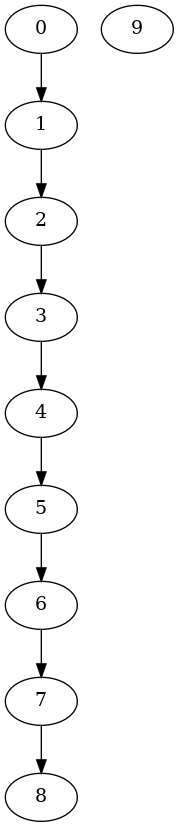

In [40]:
# Jupyter notebook setup to export images in HTML.
import base64, io, IPython
from PIL import Image as PILImage
from IPython.display import Image
from IPython.core.display import HTML

image = PILImage.open("base_graph.png")
output = io.BytesIO()
image.save(output, format='PNG')
encoded_string = base64.b64encode(output.getvalue()).decode()

html = '<img src="data:image/png;base64,{}"/>'.format(encoded_string)
IPython.display.HTML(html)

Show sub-graph


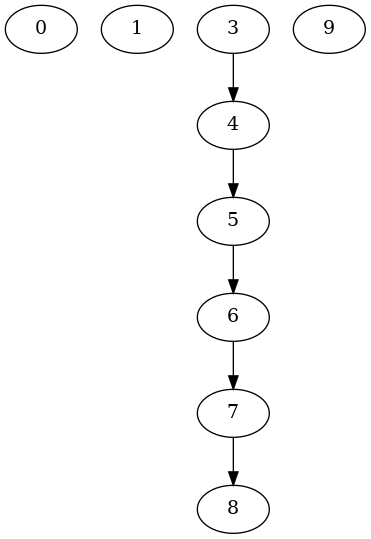

In [41]:
image = PILImage.open("sub_graph.png")
output = io.BytesIO()
image.save(output, format='PNG')
encoded_string = base64.b64encode(output.getvalue()).decode()

html = '<img src="data:image/png;base64,{}"/>'.format(encoded_string)
IPython.display.HTML(html)